# Lab Class Week 5

## Demo Code

Here is a copy of the code available to download from the pdf.

In [1]:
#include <iostream>
#include <fstream>
#include <random>
#include <cmath>
#include <vector>
#include <algorithm>
using namespace std;

In [2]:
double monteCarlo(double S0,double strikePrice,double interestRate,double sigma,double maturity,int N)
{
  // declare the random number generator
  mt19937 rng;
  // declare the distribution
  normal_distribution<> ND(0.,1.);
  ND(rng);
  // initialise sum
  double sum=0.;
  for(int i=0;i<N;i++)
  {
    double phi=ND(rng);
    double ST=S0 * exp( (interestRate - 0.5*sigma*sigma)*maturity + phi*sigma*sqrt(maturity) );
    sum = sum + max( ST - strikePrice , 0. );
  }
  return sum/N*exp(-interestRate*maturity);
}

In [3]:
{
  cout << monteCarlo(9.576,10.,0.05,0.4,0.75,1000) << endl;
}

1.2671


## Tasks

- Put the Monte Carlo code into a function, and check the result. Use this code if you get stuck:-[click here to download](https://personalpages.manchester.ac.uk/staff/paul.johnson-2/resources/math60082/MYCODES/solutions-sheet-3-2-5.cpp)
- Run this function several times -- what happens?
- Write the keyword `static` in front of the declaration of the random number generator like this:-
~~~
static mt19937 rng;
~~~
and try again. What happens now?
- Run this code for $N=100,200,300,\dots$ and plot out the results for different $N$. What does it look like?

First run a few times

In [4]:
{
  cout << monteCarlo(9.576,10.,0.05,0.4,0.75,1000) << endl;
  cout << monteCarlo(9.576,10.,0.05,0.4,0.75,1000) << endl;
  cout << monteCarlo(9.576,10.,0.05,0.4,0.75,1000) << endl;
  cout << monteCarlo(9.576,10.,0.05,0.4,0.75,1000) << endl;
  cout << monteCarlo(9.576,10.,0.05,0.4,0.75,1000) << endl;
  cout << monteCarlo(9.576,10.,0.05,0.4,0.75,1000) << endl;
}

1.2671
1.2671
1.2671
1.2671
1.2671
1.2671


All the values are the same?!?!?!? This is because the variable `rng` is created every time the function is run, resetting the random number generator back to the start. Fix this by making the variable `static` so that it only gets created once the first time a function is called.

In [5]:
double monteCarloStatic(double S0,double strikePrice,double interestRate,double sigma,double maturity,int N)
{
  // declare the random number generator
  static mt19937 rng;
  // declare the distribution
  normal_distribution<> ND(0.,1.);
  ND(rng);
  // initialise sum
  double sum=0.;
  for(int i=0;i<N;i++)
  {
    double phi=ND(rng);
    double ST=S0 * exp( (interestRate - 0.5*sigma*sigma)*maturity + phi*sigma*sqrt(maturity) );
    sum = sum + max( ST - strikePrice , 0. );
  }
  return sum/N*exp(-interestRate*maturity);
}

I've had to rename the function to get it to work here, you don't have to do that.

In [6]:
{
  cout << monteCarloStatic(9.576,10.,0.05,0.4,0.75,1000) << endl;
  cout << monteCarloStatic(9.576,10.,0.05,0.4,0.75,1000) << endl;
  cout << monteCarloStatic(9.576,10.,0.05,0.4,0.75,1000) << endl;
  cout << monteCarloStatic(9.576,10.,0.05,0.4,0.75,1000) << endl;
  cout << monteCarloStatic(9.576,10.,0.05,0.4,0.75,1000) << endl;
  cout << monteCarloStatic(9.576,10.,0.05,0.4,0.75,1000) << endl;
}

1.2671
1.33243
1.22289
1.31114
1.55638
1.32801


Now write some values of this function for different values of $N$.

In [7]:
{
    // open up a file stream to write data
    ofstream output;
    // here we are going to use comma separated variables, so end the filename with .csv

    // I'm outputing to current working directory
    output.open("test-5-1.csv");

    if(!output.is_open())
    {
        // NOTE!!!! The file will not open unless the directory exists!!!
        cout << " File not opened \n";
        // stop the program here
        throw;
    }
    // write N vs P(a,b,N) to a file
    // each column must be separated by a comma
    // each row goes on a new line
    for(int N=10;N<=1000;N++)
    {
        output << N << " , " << monteCarloStatic(9.576,10.,0.05,0.4,0.75,N) <<endl;
    }
    // file write successful then close file
    cout << " File write successful \n";
    output.close();
}

 File write successful 


In [8]:
#include "math60082_lab_plot_loader.hpp"

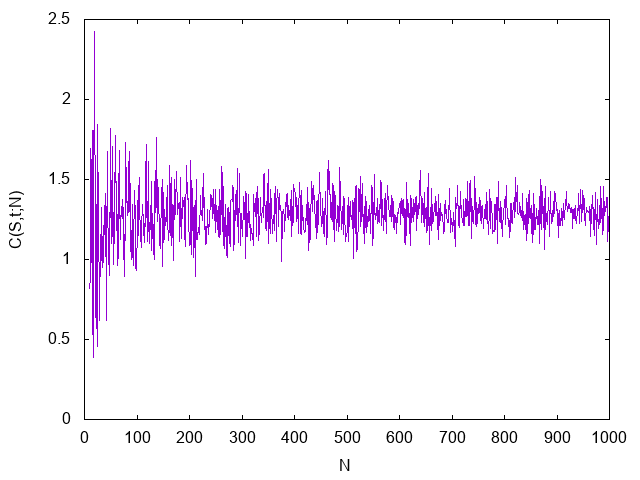

In [9]:
MATH60082::gnuplotImage fig1;
{
    std::stringstream ss;
    ss << "set datafile separator ','" << endl;
    ss << "set xlabel 'N'" << endl;
    ss << "set ylabel 'C(S,t;N)'" << endl;
    ss << "unset key"<< endl;
    ss << "p'test-5-1.csv' u 1:2 w l";
    fig1 = MATH60082::GnuplotWidget::plotCommand(&ss);
    
}
fig1

## Tasks

- Run this analysis to get confidence intervals for a range of values for $N$ and $M$
- If $N*M$ stays the same, what can you say about the confidence interval? Why?
- Try different payoff functions, say put options, binary options, different parameters.
- What has the most effect on the results?

You can change the values of $N$ and $M$ in the box below:-

In [10]:
{
    // run the code 100 times and take the average, like taking N*M paths
    int M=100;

    // number of paths in each calculation
    int N=1000;

    cout << " ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~"<<endl;
    cout << " Run results with M="<<M<<" samples from V_N, where N="<<N<<"."<<endl;

    // estimate the mean and variance from the sample
    double sum=0.;
    double sumSq = 0.;
    for(int i=0;i<M;i++)
    {
        double value = monteCarloStatic(9.576,10.,0.05,0.4,0.75,N);
        sum+=value;
        sumSq+=value*value;
    }
    double mean = sum/M;
    double variance = sumSq/M - mean*mean;
    cout << " variance = " << variance << endl; 

    // get the standard deviation of the sample mean
    cout << " variance of the sample mean = " << variance/M << endl; 
    double sd = sqrt(variance/M);
    cout << " 95% confident result is in ["<<mean-2.*sd << "," << mean+2.*sd << "] with "<< N*M << " total paths." << endl;

}

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 Run results with M=100 samples from V_N, where N=1000.
 variance = 0.00542748
 variance of the sample mean = 5.42748e-05
 95% confident result is in [1.28119,1.31065] with 100000 total paths.


Note that you could use $N=1$ or even just calculate the variance inside the algorithm, but it is more efficient to split out the calculation as outlined above.